In [1]:
## Задание 1.
## Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

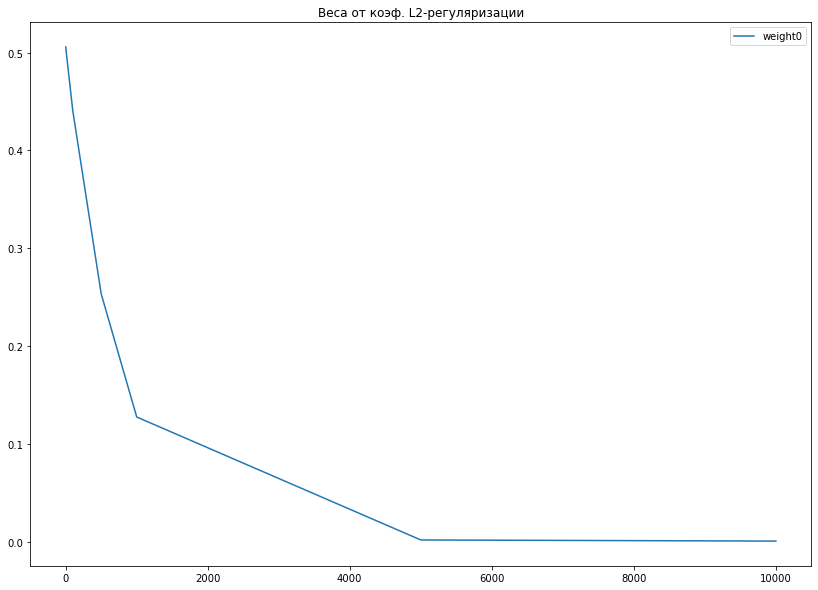

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 2, 1, 3, 0, 5, 10, 1, 2], # стаж
 [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000], # стоимость
 [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]) # квалификация репетитора

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
    return W
    
lambdas = [1e-6, 1e-2, 1e-1, 1, 1e1, 1e2, 5e2, 1e3, 5e3, 1e4]
weights = []
for lambda_coef in lambdas:
    weights.append(eval_model_reg2(X, y, 1000, alpha=7e-7, lambda_=lambda_coef))
    
weights_zipped = list(zip(*weights))

fig, ax = plt.subplots(figsize=(14,10))
for i, weight in enumerate(weights_zipped):
    ax.plot(lambdas, weight, label=f'weight{i}')
    ax.set_title('Веса от коэф. L2-регуляризации')
    ax.legend()
    plt.show()


In [ ]:
## Задание 2.
## Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
## Можно, но смысла в этом нет, т.к. нормализация приведет данные к шкале [0, 1], а стандартизация к среднему = 0 и
## стандартному отклонению = 1. Таким образом шкала будет либо одна, либо другая.

In [10]:
## Задание 3.
## Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.
## def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
##    np.random.seed(42)
##    W = np.random.randn(X.shape[0])
##    n = X.shape[1]
##    for i in range(1, iterations + 1):
##        y_pred = np.dot(W, X)
##        err = calc_mse(y, y_pred)
##        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
##    return W

def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W